In [39]:
import numpy as np 
import pandas as pd 

# Load train data 
train_file = 'titanic_train.csv'
test_file = 'titanic_test.csv'
train_data = pd.read_csv(train_file)
print("There are {} samples in train data".format(len(train_data)))

# Load test data 
test_data = pd.read_csv(test_file)
print("There are {} samples in test data".format(len(test_data)))
PassengerId = test_data['PassengerId']

# Set the labels of test data as na 
test_data['Survived'] = np.nan

df = pd.concat([train_data, test_data], axis=0, ignore_index=True)
df.info()
df.head()

There are 891 samples in train data
There are 418 samples in test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [40]:
# Check how many null values in each feature 
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### For the null values above, we decide to deal as following 
* The age null values can be filled by regression method 
* The Emabarked feature can be filled according to the fare and pclass 
* There are many null values in cabin. For better prediction, it is believed to delete the feature of Cabin. But here we need this feature beacuse when the ship sinks, certain parts of the ship have different probability drown in water. So we deal to make a new feature to subsitute the feature.
* The fare can be filled up with median value or mean value 
* The survived is the target to predict 

## 2. Missing values process 

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

### 2.1 Embarked

In [42]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [43]:
df['Ticket_num'] = df['Ticket'].map(lambda x: re.sub('\D', '', x))
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'])
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,521171.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,17599.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,23101282.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113803.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373450.0


In [44]:
df[(df['Ticket_num']<114000) & (df['Ticket_num'] > 110000) & (df['Fare']>=80)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num
61,38.00,B28,NaN,80.00,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,113572.0
257,30.00,B77,S,86.50,"Cherry, Miss. Gladys",0,258,1,female,0,1.0,110152,110152.0
297,2.00,C22 C26,S,151.55,"Allison, Miss. Helen Loraine",2,298,1,female,1,0.0,113781,113781.0
305,0.92,C22 C26,S,151.55,"Allison, Master. Hudson Trevor",2,306,1,male,1,1.0,113781,113781.0
377,27.00,C82,C,211.50,"Widener, Mr. Harry Elkins",2,378,1,male,0,0.0,113503,113503.0
390,36.00,B96 B98,S,120.00,"Carter, Mr. William Ernest",2,391,1,male,1,1.0,113760,113760.0
435,14.00,B96 B98,S,120.00,"Carter, Miss. Lucile Polk",2,436,1,female,1,1.0,113760,113760.0
498,25.00,C22 C26,S,151.55,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",2,499,1,female,1,0.0,113781,113781.0
504,16.00,B79,S,86.50,"Maioni, Miss. Roberta",0,505,1,female,0,1.0,110152,110152.0
708,22.00,NaN,S,151.55,"Cleaver, Miss. Alice",0,709,1,female,0,1.0,113781,113781.0


In [45]:
df['Embarked'].fillna('S', inplace=True)

### 2.2 Age
The age feature has 263 null values. So we use random forest regression model to simulate the value. The features we use here are sex, title, pclass 

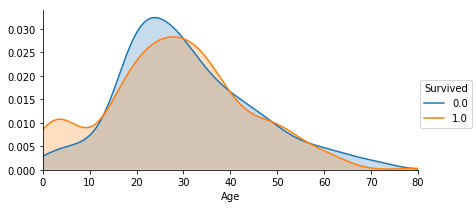

In [46]:
g = sns.FacetGrid(df[:890], hue='Survived', aspect=2)
g.map(sns.kdeplot, 'Age', shade=True)
g.set(xlim=(0, df.loc[0:890, 'Age'].max()))
g.add_legend()

In [47]:
from sklearn.ensemble import RandomForestRegressor 

age_df = df[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp']]
age_df = pd.get_dummies(age_df)
know_age = age_df[age_df.Age.notnull()]
unknow_age = age_df[age_df.Age.isnull()]
y = know_age.iloc[:, 0]
X = know_age.iloc[:, 1:]
rf = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rf.fit(X, y)
age_predicts = rf.predict(unknow_age.iloc[:, 1:])

df.loc[df.Age.isnull(), 'Age'] = age_predicts

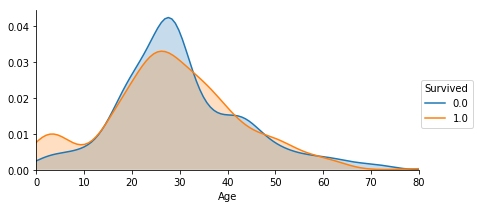

In [48]:
g = sns.FacetGrid(df[0:890], hue='Survived', aspect=2)
g.map(sns.kdeplot, 'Age', shade=True)
g.set(xlim=(0, df.loc[0:890, 'Age'].max()))
g.add_legend()

### 2.3 Fare
The feature has 1 null values, So we use median value to fill up

In [49]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,3701.0


In [50]:
fare = df.loc[(df['Embarked']=='S') & (df['Pclass']==3), 'Fare'].median()
df['Fare'].fillna(fare, inplace=True)

## 3.  Create new feature

### 3.1 Title

In [51]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
titles

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [52]:
# Make a dictionary for mapping the titles into three kinds
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Master",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona" : "Royalty"    
}

df['Title'] = df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].map(Title_Dictionary)

In [53]:
df['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

### 3.2 Surname

In [54]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,521171.0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,17599.0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,23101282.0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113803.0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373450.0,Mr


In [55]:
# df['Surname'].value_counts()

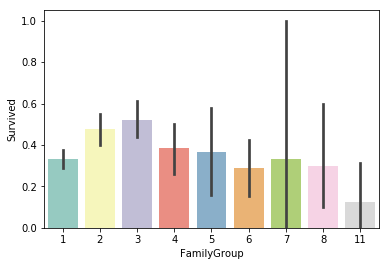

In [56]:
df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
df['FamilyGroup'] = df['Surname'].map(df['Surname'].value_counts())

sns.barplot(x='FamilyGroup', y='Survived', data=df, palette='Set3')


In [57]:
Female_Child_Group = df.loc[(df['FamilyGroup']>=2) & ((df['Age']<=16) | (df['Sex']=='female'))]
Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List = set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)

Male_Adult_Group = df.loc[(df['FamilyGroup']>=2) & (df['Age']>16) & (df['Sex']=='male')]
Male_Adult_List = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List = set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Oreskovic', 'Sage', 'Lobb', 'Cacic', 'Ilmakangas', 'Canavan', 'Rosblom', 'Jussila', 'Strom', 'Skoog', 'Turpin', 'Vander Planke', 'Ford', 'Johnston', 'Attalah', 'Panula', 'Caram', 'Van Impe', 'Goodwin', 'Olsson', 'Rice', 'Bourke', 'Robins', 'Zabour', 'Boulos', 'Lahtinen', 'Palsson', 'Danbom', 'Elias', 'Barbara', 'Arnold-Franchi', 'Lefebre'}
{'Duff Gordon', 'Greenfield', 'Taylor', 'Bradley', 'Jussila', 'Beane', 'Cardeza', 'Harder', 'Goldenberg', 'McCoy', 'Dick', 'Jonsson', 'Daly', 'Chambers', 'Kimball', 'Frolicher-Stehli', 'Beckwith', 'Frauenthal', 'Moubarek', 'Bishop', 'Nakid'}


In [58]:
df.loc[(df['Survived'].isnull()) & (df['Surname'].apply(lambda x:x in Dead_List)), ['Sex', 'Age', 'Title']] = ['male', 28, 'Mr']
df.loc[(df['Survived'].isnull()) & (df['Surname'].apply(lambda x:x in Survived_List)), ['Sex', 'Age', 'Title']] = ['female', 5, 'Miss']


### 3.3 FamilySize 

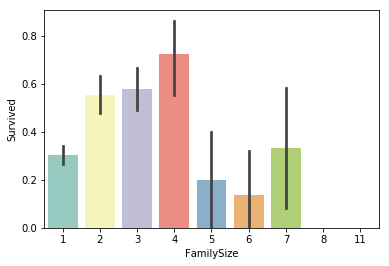

In [60]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
sns.barplot(x='FamilySize', y='Survived', data=df, palette='Set3')

In [61]:
# def fam_label(s):
#     if (s>=2) & (s<=4):
#         return 2 
#     elif ((s>4) & (s<=7)) | (s==1):
#         return 1 
#     elif (s>7):
#         return 0 
    
# df['FamilyLabel'] = df['FamilySize'].apply(fam_label)
# sns.barplot(x='FamilyLabel', y='Survived', data=df, palette='Set3')

### 3.4 Deck

In [62]:
# df['Cabin'].str.get(0)

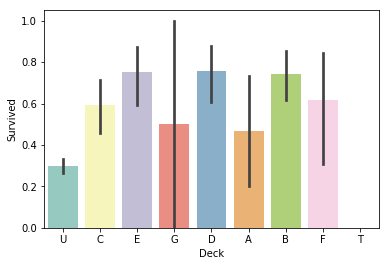

In [63]:
df['Cabin'] = df['Cabin'].fillna('Unknow')
df['Deck'] = df['Cabin'].str.get(0)
sns.barplot(x='Deck', y='Survived', data=df, palette='Set3')

### 3.5 TicketGroup

In [64]:
# dict(df['Ticket'].value_counts())

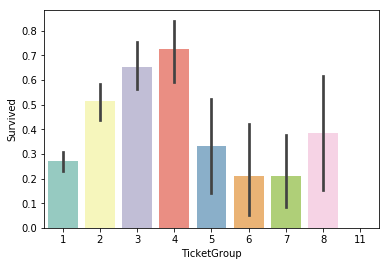

In [65]:
Ticket_Count = dict(df['Ticket'].value_counts())
df['TicketGroup'] = df['Ticket'].map(Ticket_Count)
sns.barplot(x='TicketGroup', y='Survived', data=df, palette='Set3')

In [66]:
# def Ticket_Label(s):
#     if (s>=2) & (s<=4):
#         return 2 
#     elif ((s>4) & (s<=8)) | (s==1):
#         return 1 
#     elif (s>8):
#         return 0 
    
# df['TicketGroup'] = df['TicketGroup'].apply(Ticket_Label)
# sns.barplot(x='TicketGroup', y='Survived', data=df, palette='Set3')

In [67]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Ticket_num', 'Title',
       'Surname', 'FamilyGroup', 'FamilySize', 'Deck', 'TicketGroup'],
      dtype='object')

In [68]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num,Title,Surname,FamilyGroup,FamilySize,Deck,TicketGroup
0,22.0,Unknow,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,521171.0,Mr,Braund,2,2,U,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,17599.0,Mrs,Cumings,2,2,C,2
2,26.0,Unknow,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,23101282.0,Miss,Heikkinen,1,1,U,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113803.0,Mrs,Futrelle,2,2,C,2
4,35.0,Unknow,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373450.0,Mr,Allen,2,1,U,1


In [70]:
# df1 = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 
#           'Title', 'FamilyLabel', 'Deck', 'TicketGroup']]
df1 = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 
          'Title', 'Deck', 'TicketGroup']]
df1.isnull().sum()

Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            0
Deck             0
TicketGroup      0
dtype: int64

## 4.Model Prediction 

### Random Forest

In [71]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,TicketGroup
0,0.0,3,male,22.0,7.2500,S,Mr,U,1
1,1.0,1,female,38.0,71.2833,C,Mrs,C,2
2,1.0,3,female,26.0,7.9250,S,Miss,U,1
3,1.0,1,female,35.0,53.1000,S,Mrs,C,2
4,0.0,3,male,35.0,8.0500,S,Mr,U,1


In [74]:
# df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Title', 'FamilyLabel', 'Deck', 'TicketGroup']]
df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Title', 'Deck', 'TicketGroup']]
df1 = pd.get_dummies(df1)
train = df1[df1['Survived'].notnull()]
test = df1[df1['Survived'].isnull()]
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [75]:
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import cross_validate 

select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state=42, 
                             warm_start=True,
                             n_estimators=26,
                             max_depth=6, 
                             max_features='sqrt'
                            )
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

cv_result = cross_validate(pipeline, X, y, cv=10)
print('CV Test Score: Mean - %.7g | std - %.7g' % (np.mean(cv_result['test_score']), np.std(cv_result['test_score'])))

CV Test Score: Mean - 0.829409 | std - 0.03643193


In [78]:
test_X = test.iloc[:, 1:]
predictions = pipeline.predict(test_X)
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':predictions.astype(np.int32)})
submission.to_csv('submission_2019_11_17.csv', index=False)

### xgboost

In [79]:
from sklearn.feature_selection import SelectKBest 
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate 
import warnings 
warnings.filterwarnings('ignore')

select = SelectKBest(k = 20)
clf = XGBClassifier(
    max_depth = 3, 
    learning_rate=0.1,
    n_estimators=100,
    slient = True, 
    objective='binary:logistic',
    booster='gbtree',
    nthread=None,
    gamma = 0, 
    subsample=0.8,
    colsample_bytree = 1,
    colsample_bylevel = 1,
    reg_alpha = 0,
    reg_lambda = 1,
    scale_pos_weight = 1.2,
    base_score = 0.5
)
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)
cv_result = cross_validate(pipeline, X, y, cv=10)
print('CV Test score: Mean - %.7g | Std - %.7g' % (np.mean(cv_result['test_score']), np.std(cv_result['test_score'])))

CV Test score: Mean - 0.8372114 | Std - 0.03651645


In [80]:
predictions = pipeline.predict(test_X)
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':predictions.astype(np.int32)})
# submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':predictions.astype(np.int32)})
submission.to_csv('submission_xgboost_2019_11_17.csv', index=False)

### RandomForest tuning 

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
rfc = RandomForestClassifier()

rfc_param_grid = {
#     'max_depth': [None],
    'max_features': ['sqrt'],
#     'min_samples_split': [2,3,10],
#     'min_samples_leaf': [1,3,10],
#     'bootstrap': [False],
#     'n_estimators': [100, 300],
    'criterion': ['gini'],
    'random_state': [42], 
    'warm_start':[True],
    'n_estimators':[10, 30, 100],
    'max_depth':[5,6,7], 
}
gsRFC = GridSearchCV(rfc, param_grid=rfc_param_grid, cv=kfold, scoring='accuracy',
                    n_jobs=-1, verbose=1)
gsRFC.fit(X, y)
rfc_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   36.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   37.3s finished


0.8417508417508418

In [83]:
predictions = rfc_best.predict(test_X)
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':predictions.astype(np.int32)})
submission.to_csv('submission_rfc_tunning_2019_11_17.csv', index=False)